In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv(r"C:\Users\pylaa\Downloads\global_climate_energy_2020_2024.csv")
data

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60
...,...,...,...,...,...,...,...,...,...,...
36535,2024-12-27,Indonesia,10.91,85.88,134.23,6607.39,22.04,69.43,76.38,160.33
36536,2024-12-28,Indonesia,10.91,65.14,366.68,4654.41,23.79,62.66,43.33,58.49
36537,2024-12-29,Indonesia,10.91,66.33,256.12,1982.89,14.92,77.53,76.67,148.77
36538,2024-12-30,Indonesia,10.91,39.18,251.60,2689.54,21.66,62.92,72.84,153.20


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       36540 non-null  object 
 1   country                    36540 non-null  object 
 2   avg_temperature            36540 non-null  float64
 3   humidity                   36540 non-null  float64
 4   co2_emission               36540 non-null  float64
 5   energy_consumption         36540 non-null  float64
 6   renewable_share            36540 non-null  float64
 7   urban_population           36540 non-null  float64
 8   industrial_activity_index  36540 non-null  float64
 9   energy_price               36540 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.8+ MB


In [4]:
data.describe()

,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
count,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000
mean,13.580868,59.971469,445.820452,7295.904857,15.944080,74.982156,70.173094,115.279848
std,10.077249,17.303103,234.360906,3693.928504,5.334804,8.645400,17.334816,49.178361
min,-9.600000,30.000000,50.150000,1001.890000,5.000000,60.000000,40.000000,30.000000
25%,5.630000,45.010000,248.675000,4184.177500,12.020000,67.470000,55.300000,72.420000
50%,13.790000,59.990000,422.655000,6921.620000,15.715000,75.030000,70.055000,115.240000
75%,20.840000,74.970000,628.422500,10175.110000,19.840000,82.502500,85.260000,158.270000
max,38.710000,90.000000,999.850000,15998.050000,30.870000,90.000000,100.000000,200.000000


In [5]:
for col in data.columns:
    missing_count = data[col].isnull().sum()
    pct_missing = (data[col].isnull().mean()) * 100
    dtype = data[col].dtype
    print(f'{col} |  {dtype} | Missing: {missing_count} ({pct_missing:.2f}%)')

date |  object | Missing: 0 (0.00%)
country |  object | Missing: 0 (0.00%)
avg_temperature |  float64 | Missing: 0 (0.00%)
humidity |  float64 | Missing: 0 (0.00%)
co2_emission |  float64 | Missing: 0 (0.00%)
energy_consumption |  float64 | Missing: 0 (0.00%)
renewable_share |  float64 | Missing: 0 (0.00%)
urban_population |  float64 | Missing: 0 (0.00%)
industrial_activity_index |  float64 | Missing: 0 (0.00%)
energy_price |  float64 | Missing: 0 (0.00%)


In [6]:
data.columns = (
    data.columns
    .str.lower()
    .str.replace(" ", "_")
)

In [11]:
data["date"] = pd.to_datetime(data["date"])

In [12]:
data["year"] = data["date"].dt.year

In [13]:
data["year"] = data["year"].astype(int)

Index(['date', 'country', 'avg_temperature', 'humidity', 'co2_emission',
       'energy_consumption', 'renewable_share', 'urban_population',
       'industrial_activity_index', 'energy_price'],
      dtype='object')

In [16]:
# Sort for time-based calculations
data = data.sort_values(["country", "year"])

# Year-over-Year change
data["co2_yoy_change"] = data.groupby("country")["co2_emission"].pct_change() * 100
data["renewables_yoy_change"] = data.groupby("country")["renewable_share"].pct_change() * 100


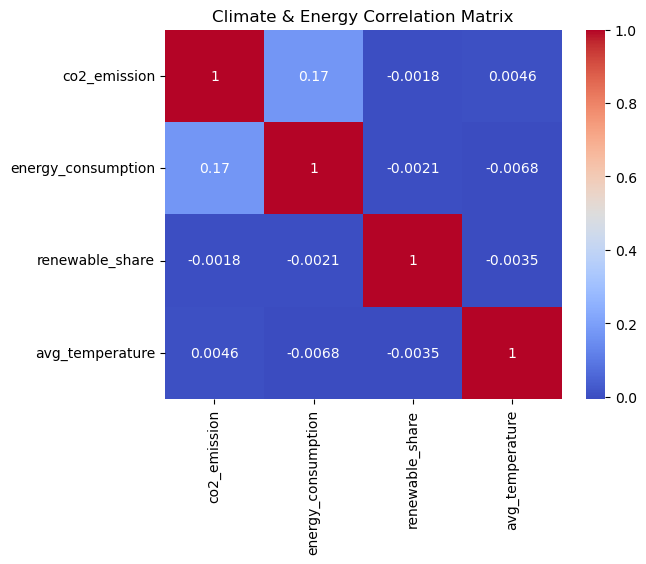

In [18]:
corr = data[[
    "co2_emission",
    "energy_consumption",
    "renewable_share",
    "avg_temperature"
]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Climate & Energy Correlation Matrix")
plt.show()


In [19]:
top_emitters = (
    data.groupby("country")["co2_emission"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
top_emitters


country
Australia        454.389059
Mexico           449.765840
Japan            449.510443
Germany          449.447334
South Africa     449.359163
China            448.988894
France           448.679956
Norway           447.815567
United States    447.627121
Spain            446.868708
Name: co2_emission, dtype: float64

In [20]:
data.to_csv("cleaned_climate_energy.csv", index=False)
